# Mine Pit Dewatering Solutions

Local testing

In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('../pygaf'))
import pygaf

## `MineSteadyRadUnconf` Class

In [2]:
S1 = pygaf.MineSteadyRadUnconf()
S1.info()
S1.aq.info()

METHOD REFERENCE
----------------
Bouwer H. (1978) - Groundwater Hydrology.

Conceptual Model:
- Infinite, unconfined and homogeneous aquifer.
- Dewatering via an imaginary pumping well with radius rp.
- Steady, horizontal, axially symmetric and unconfined flow.
- Uniform recharge.
- Horizontal pre-mining water table.

AQUIFER INFORMATION
-------------------
Type: 2D, unconfined homogeneous aquifer
Name: Unnamed
Hydraulic conductivity: 1 [L/T]
Specific yield: 0.1 [1]
Static saturated thickness: 100 [L]
Static transmissivity: 100 [L2/T]
Bottom elevation: 0 [RL]
Static water level: 100 [RL]



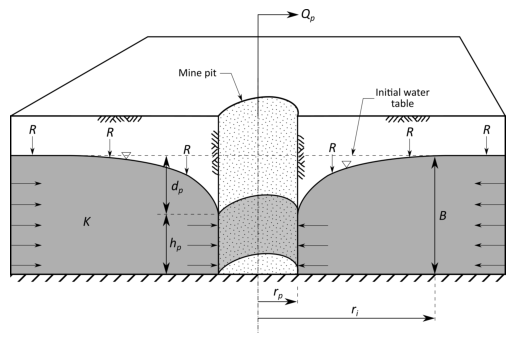

In [3]:
S1.draw()

In [4]:
S1.aq.K = 0.1
S1.aq.B = 154
S1.dp = 104
S1.rp = 127
S1.R = 50/1000/365

In [5]:
print(S1.aq.K, S1.aq.B, S1.dp, S1.hp, S1.rp, S1.R, S1.ri, S1.qp)

0.1 154 104 50 127 0.00013698630136986303 2310.5484609373693 2290.567562282991
